# Lista 3- Dissecação placa, carregamento triangular

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import sympy as smp
import fourierdouble as fd

### É definido as variaveis de modo simbólico

In [2]:
x,y,a,b,p,wm,v,d,E,h=smp.symbols('x y a b p wm v d E h')
m,n,i,j=smp.symbols('m n i j', int=True)


### A amplitude do carregamento de fourier em duplo seno foi cálculado manualmente
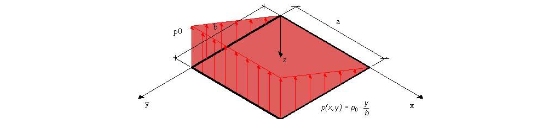

In [3]:
k=fd.sfourier_value(10-10*y/10 ,15,10,10,10)
fmn=k[0]


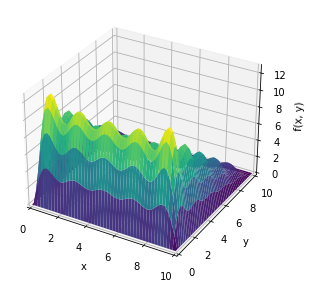

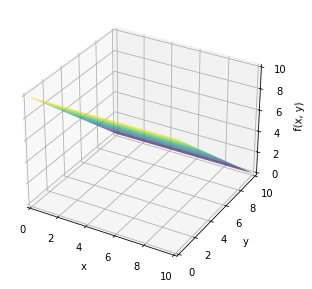

0.920841346849942


In [4]:
fourier=fd.sfourier_doublesin(10-10*y/10 ,15,10,10,10)

#### É atribuidos valores para as propriedade e dimensões da placa. A amplitude do deslocamento da placa foi obtido pela solução de navier devido as condições de contorno bi apoiadas
<br>

$\Large wmn=\frac{fmn}{d\pi^4((\frac{m^2}{a^2})+\frac{n^2}{b^2})^2)}$

#### dessa forma o deslocamento é dado:
<br>

$\Large w(x,y)=\Sigma\Sigma wmn\sin{\frac{n\pi y}{b}}\sin{\frac{m\pi x}{a}}$

In [5]:
E=25000000
h=0.3
v=0.2
d=E*h**3/(12*(1-v**2))
wmn=fmn/(d*smp.pi**4*((m**2/a**2)+(n**2/b**2))**2)
freq=smp.sin(x*smp.pi*m/a)*smp.sin(y*smp.pi*n/b)
W=smp.summation((smp.summation(wmn*freq,(n,1,10))),(m,1,10))
W=W.subs([(a,15),(b,10),(p,10)])


#### Com as deformações é calculada os momentos, curvaturas, cortantes, deformações e tensões

In [6]:
dwdx2=smp.diff((smp.diff(W,x)),x)
dwdy2=smp.diff((smp.diff(W,y)),y)
mx=(dwdx2+v*dwdy2)*d
my=(dwdy2+v*dwdx2)*d
mxy=-(1-v)*d*smp.diff((smp.diff(W,y)),x)

In [7]:
dwdx3=smp.diff(smp.diff((smp.diff(W,x)),x),x)
dwdy3=smp.diff(smp.diff((smp.diff(W,y)),y),y)
dwx2y=smp.diff(smp.diff((smp.diff(W,x)),x),y)
dwxy2=smp.diff(smp.diff((smp.diff(W,x)),y),y)
vx=-d*(dwdx3+(2-v)*dwxy2)
vy=-d*(dwdy3+(2-v)*dwx2y)
dx=-h/2*dwdx2
dy=-h/2*dwdy2
gama=-h*(smp.diff((smp.diff(W,x)),y))
sigmax=E/(1-v)*(dx+v*dy)
sigmay=E/(1-v)*(v*dx+dy)
tal=E/2/(1-v)*gama

In [8]:
WW=smp.lambdify([x,y],W)
Mx=smp.lambdify([x,y],mx)
Mxy=smp.lambdify([x,y],mxy)
My=smp.lambdify([x,y],my)
Vx=smp.lambdify([x,y],vx)
Vy=smp.lambdify([x,y],vy)
kx=smp.lambdify([x,y],dwdx2)
ky=smp.lambdify([x,y],dwdy2)
εx=smp.lambdify([x,y],dx)
εy=smp.lambdify([x,y],dy)
γ=smp.lambdify([x,y],gama)
σx=smp.lambdify([x,y],sigmax)
σy=smp.lambdify([x,y],sigmay)
τxy=smp.lambdify([x,y],tal)
WW(10,5)

4.482663636529409e-19

In [9]:
m1 = np.linspace(0,15,200)
m2 = np.linspace(0,10,200)
x1,y1=np.meshgrid(m1,m2)

<a list of 18 text.Text objects>

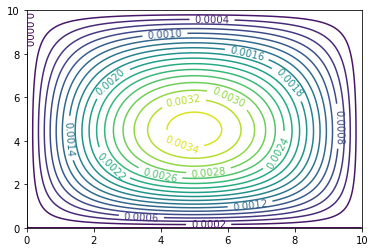

In [10]:
cont=plt.contour(x1,y1,WW(x1,y1),levels=10)
plt.clabel(cont)

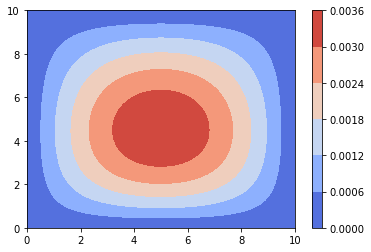

In [11]:
plt.contourf(x1,y1,WW(x1,y1),levels=5,cmap='coolwarm')
plt.colorbar()

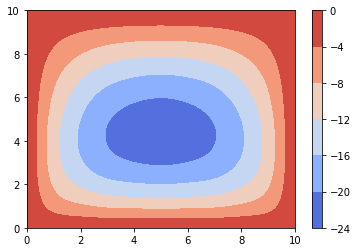

In [12]:
plt.contourf(x1,y1,Mx(x1,y1),levels=5,cmap='coolwarm')
plt.colorbar()

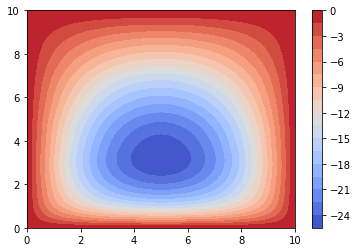

In [21]:
plt.contourf(x1,y1,My(x1,y1),levels=20, cmap='coolwarm')
plt.colorbar()

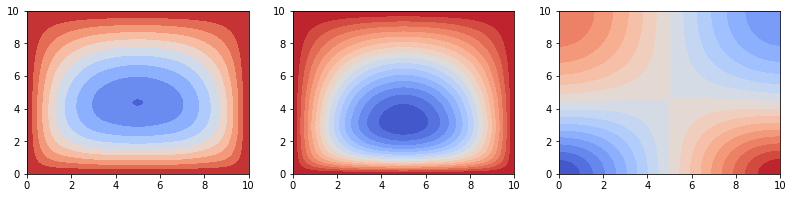

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(13.5,3))
ax = axes[0]
ax.contourf(x1,y1,Mx(x1,y1),levels=10,cmap='coolwarm')
ax1= axes[1]
ax1.contourf(x1,y1,My(x1,y1),levels=20, cmap='coolwarm')
ax2= axes[2]
ax2.contourf(x1,y1,Mxy(x1,y1),levels=20, cmap='coolwarm')

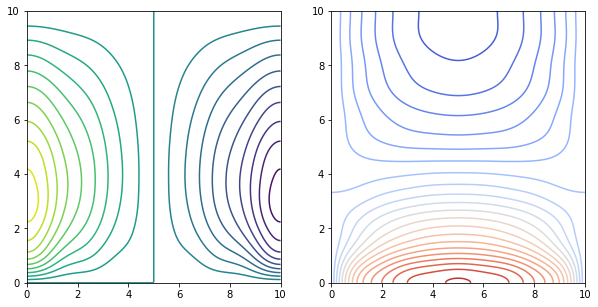

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
ax = axes[0]
ax.contour(x1,y1,Vx(x1,y1),levels=20,)
ax1= axes[1]
ax1.contour(x1,y1,Vy(x1,y1),levels=20, cmap='coolwarm')
#cortantes em x e y

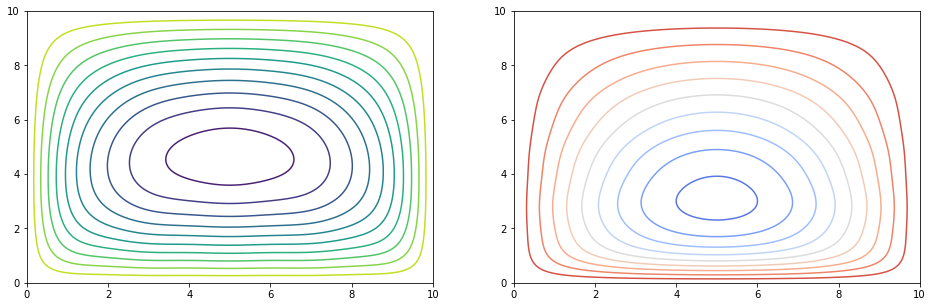

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(16,5))
ax = axes[0]
ax.contour(x1,y1,kx(x1,y1),levels=10,)
ax1= axes[1]
ax1.contour(x1,y1,ky(x1,y1),levels=10, cmap='coolwarm')
#curvaturas

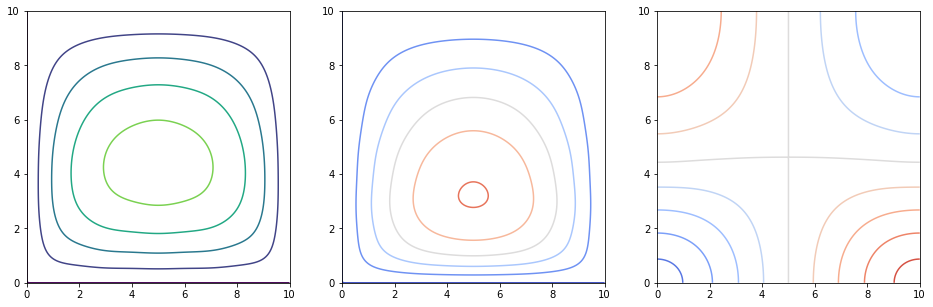

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(16,5))
ax = axes[0]
ax.contour(x1,y1,σx(x1,y1),levels=5,)
ax1= axes[1]
ax1.contour(x1,y1,σy(x1,y1),levels=5, cmap='coolwarm')
ax2= axes[2]
ax2.contour(x1,y1,τxy(x1,y1),levels=10, cmap='coolwarm')
#tensões

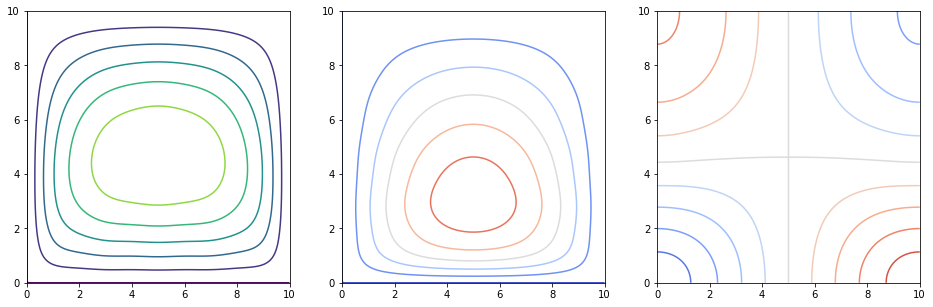

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(16,5))
ax = axes[0]
ax.contour(x1,y1,εx(x1,y1),levels=5,)
ax1= axes[1]
ax1.contour(x1,y1,εy(x1,y1),levels=5, cmap='coolwarm')
ax2= axes[2]
ax2.contour(x1,y1,γ(x1,y1),levels=10, cmap='coolwarm')
#deformações)

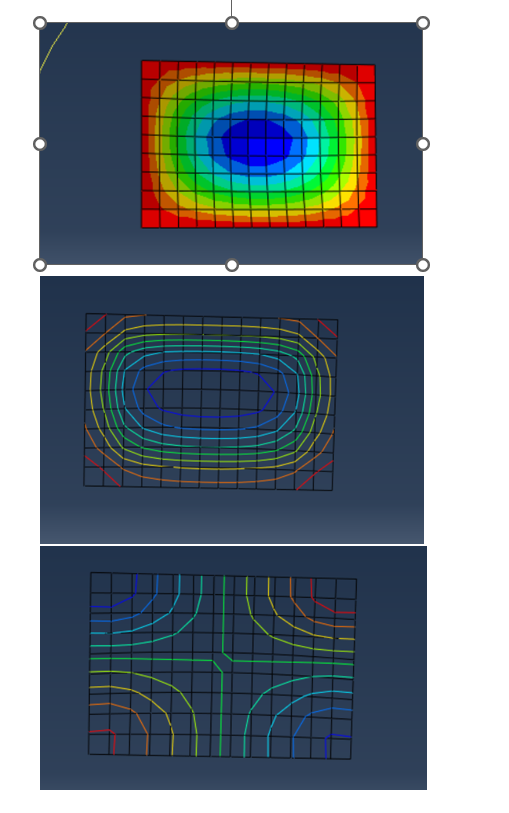